# Manufacturing Defect Analysis using Lean Six Sigma (DMAIC)
This project applies the DMAIC methodology to analyze manufacturing defect data, identify root causes, and suggest improvements for quality control.

## 1. Define Phase

**Business Problem:**  
High frequency of product defects increases cost and reduces customer satisfaction.

**Objective:**  
Identify the most frequent and costly defect types and recommend quality improvements.

**Scope:**  
Historical defect data across multiple products, locations, and inspection methods.

**Metrics Tracked:**  
- Total number of defects  
- Total repair cost  
- Severity levels

## Before Measure Phase: Import Libraries & Load Data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/dell/Downloads/defects_data.csv")

# Show first few rows
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


## 2. Measure Phase

Explore and clean the dataset to prepare for analysis.

In [3]:
# Convert date column
df['defect_date'] = pd.to_datetime(df['defect_date'])

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Data types and basic info
df.info()

# Summary statistics
df.describe()

Missing values:
 defect_id            0
product_id           0
defect_type          0
defect_date          0
defect_location      0
severity             0
inspection_method    0
repair_cost          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   defect_id          1000 non-null   int64         
 1   product_id         1000 non-null   int64         
 2   defect_type        1000 non-null   object        
 3   defect_date        1000 non-null   datetime64[ns]
 4   defect_location    1000 non-null   object        
 5   severity           1000 non-null   object        
 6   inspection_method  1000 non-null   object        
 7   repair_cost        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 62.6+ KB


,defect_id,product_id,defect_date,repair_cost
count,1000.000000,1000.000000,1000,1000.000000
mean,500.500000,50.837000,2024-03-28 08:32:38.400000,507.627150
min,1.000000,1.000000,2024-01-01 00:00:00,10.220000
25%,250.750000,26.000000,2024-02-12 00:00:00,270.902500
50%,500.500000,51.000000,2024-03-27 00:00:00,506.430000
75%,750.250000,77.000000,2024-05-14 00:00:00,759.065000
max,1000.000000,100.000000,2024-06-30 00:00:00,999.640000
std,288.819436,29.480935,NaN,289.623615


## 3. Analyze Phase

Identify the most common and expensive defects using Pareto charts and trend plots.


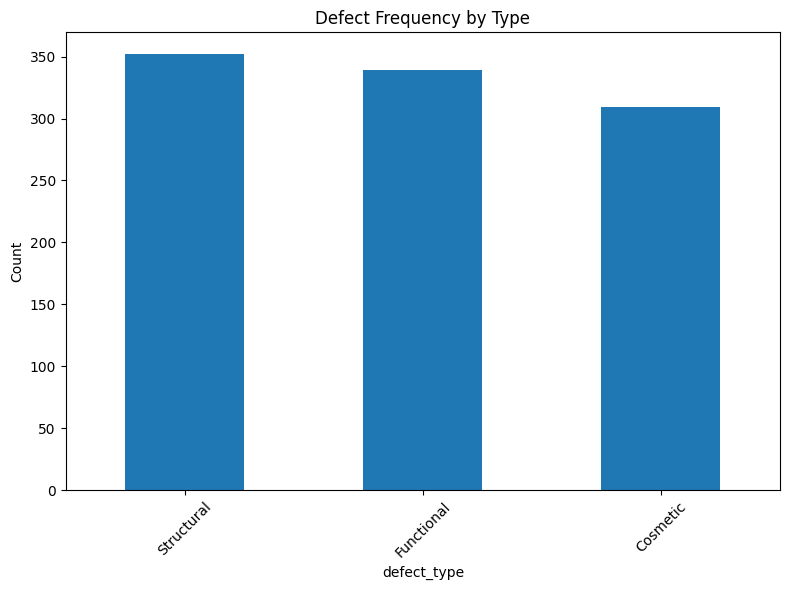

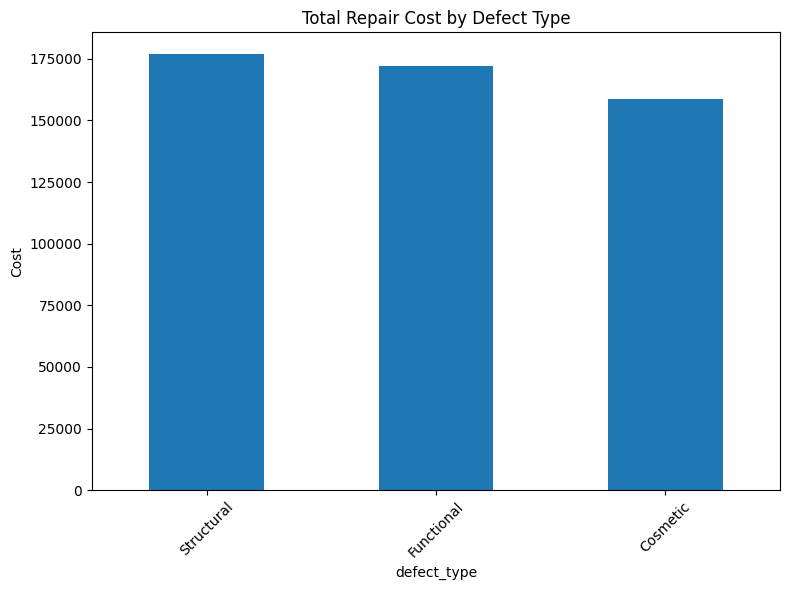

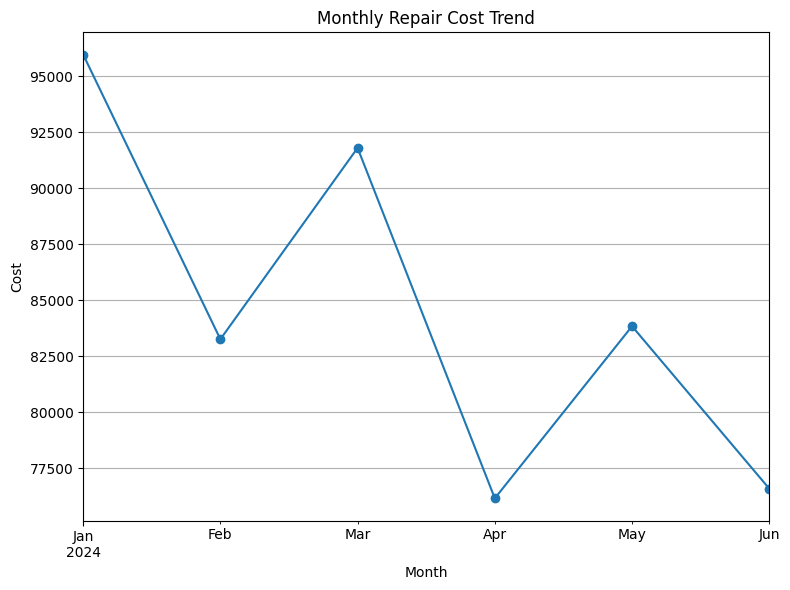

In [4]:
# Pareto - Frequency of defect types
defect_counts = df["defect_type"].value_counts()
cost_by_defect = df.groupby("defect_type")["repair_cost"].sum().sort_values(ascending=False)

# Trend - Monthly repair cost
monthly_cost = df.groupby(df["defect_date"].dt.to_period("M"))["repair_cost"].sum()

# Plot 1: Frequency
plt.figure(figsize=(8,6))
defect_counts.plot(kind="bar")
plt.title("Defect Frequency by Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Cost
plt.figure(figsize=(8,6))
cost_by_defect.plot(kind="bar")
plt.title("Total Repair Cost by Defect Type")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Monthly Trend
plt.figure(figsize=(8,6))
monthly_cost.sort_index().plot(marker="o")
plt.title("Monthly Repair Cost Trend")
plt.ylabel("Cost")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. Improve Phase

### Recommendations:
- Focus quality checks on top 3 defect types and critical severity items.
- Train inspectors on detecting early signs of high-cost defects.
- Improve inspection methods in locations with high defect concentration.


## 5. Control Phase

Monitor ongoing defect trends to ensure improvements are maintained.

### KPIs Tracked:
- Monthly number of defects
- Monthly average repair cost
- Severity distribution over time


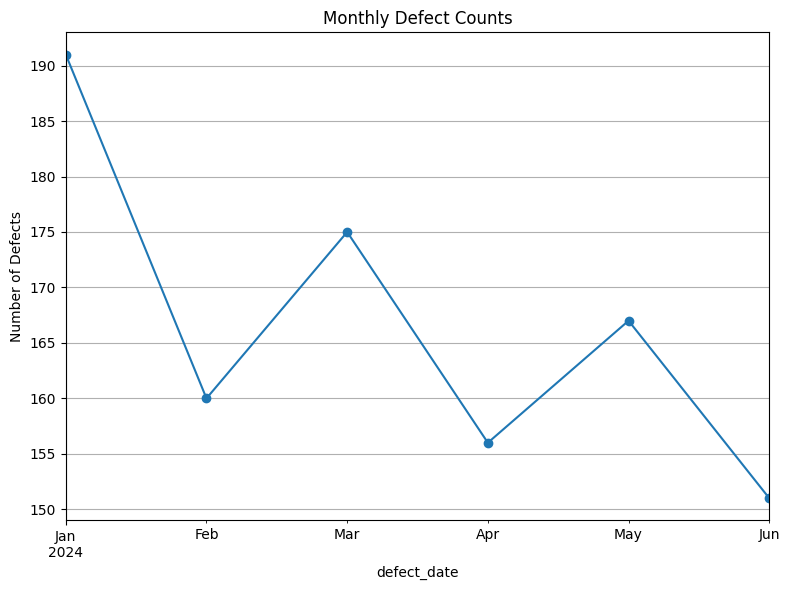

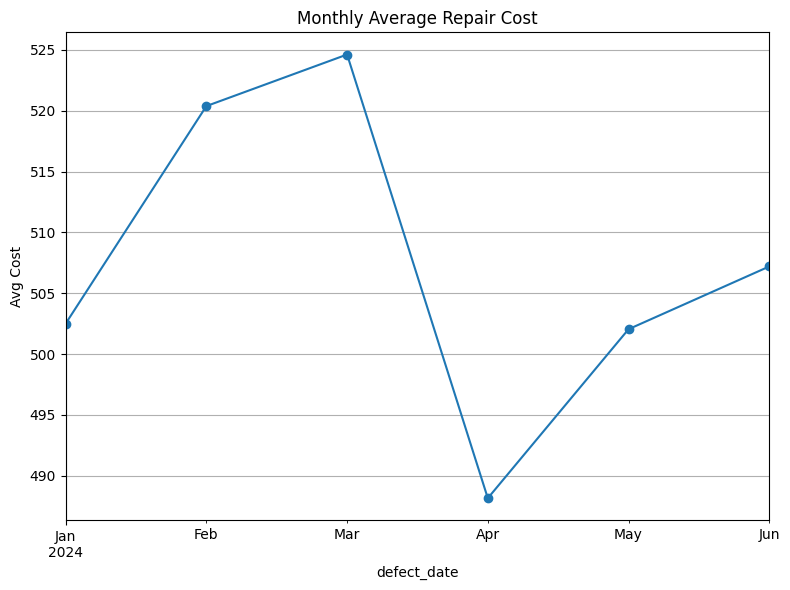

In [5]:
# KPI: Defects per month
monthly_defects = df.groupby(df["defect_date"].dt.to_period("M")).size()

# KPI: Average cost per month
monthly_avg_cost = df.groupby(df['defect_date'].dt.to_period('M'))['repair_cost'].mean()

# Plot: Defects per month
plt.figure(figsize=(8,6))
monthly_defects.plot(marker='o')
plt.title("Monthly Defect Counts")
plt.ylabel("Number of Defects")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Avg cost per month
plt.figure(figsize=(8,6))
monthly_avg_cost.plot(marker='o')
plt.title("Monthly Average Repair Cost")
plt.ylabel("Avg Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
